<a href="https://colab.research.google.com/github/saradj6923/Esurvey-Android/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
Num, Name, Week = input("Reg. Number:"), input("Name:"), input("Week:")

Reg. Number:23MCA1108
Name:Saravana Kumar T
Week:10


In [3]:
import pandas as pd
data = pd.read_csv('/content/customers.csv')

print(data.head())
print(data.isnull().sum())
print(data.dtypes)


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64
Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


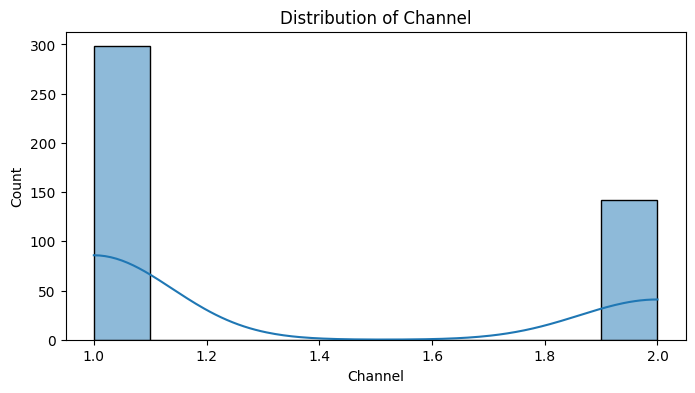

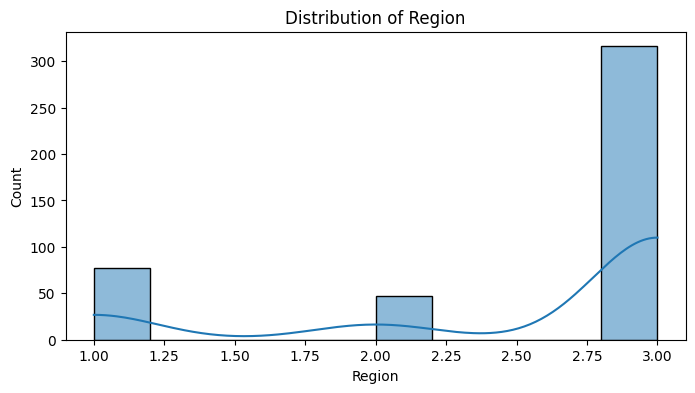

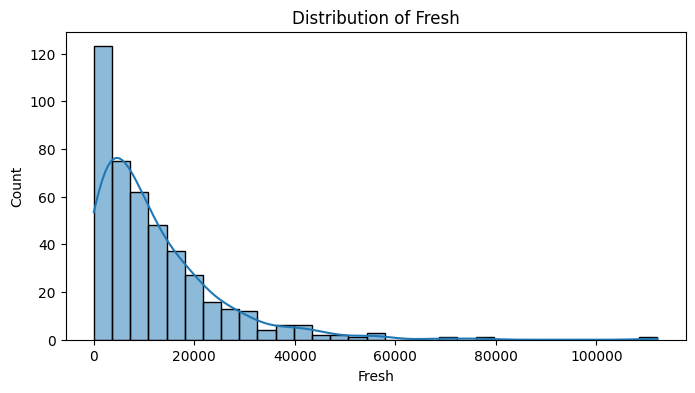

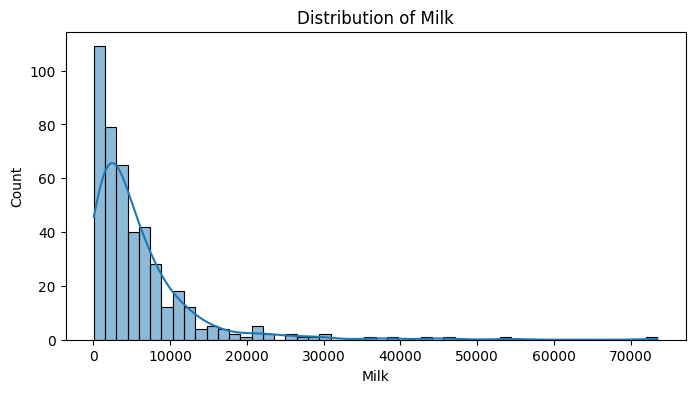

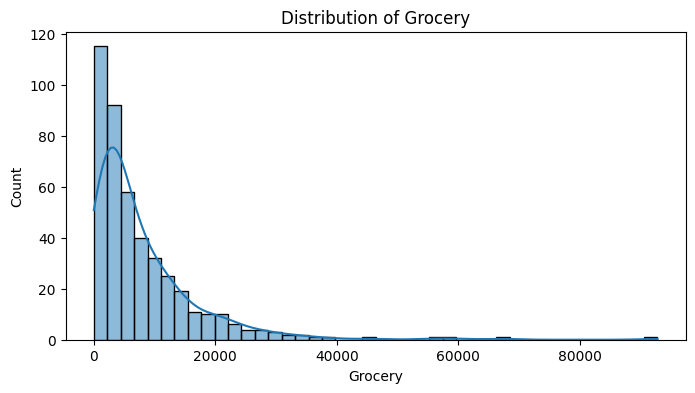

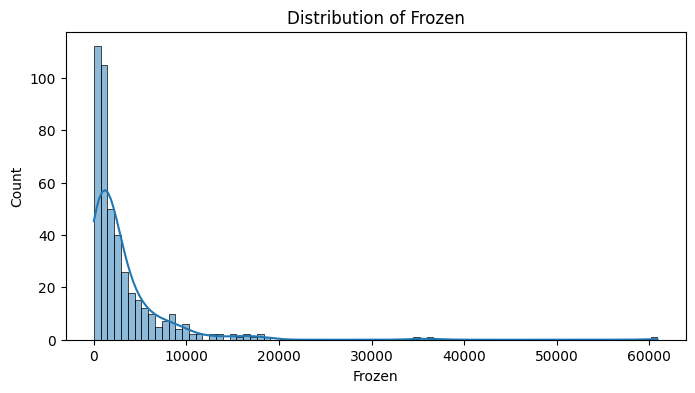

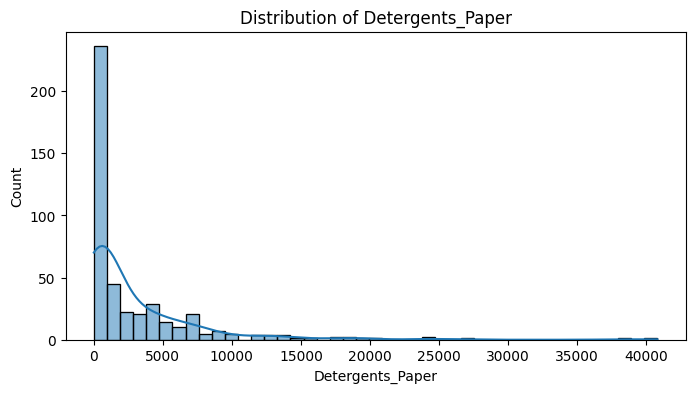

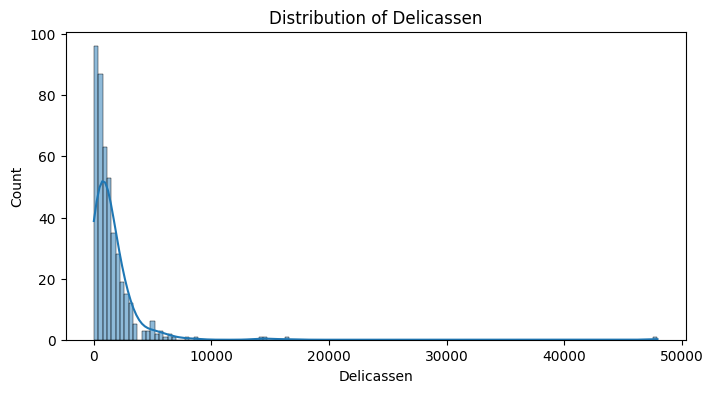

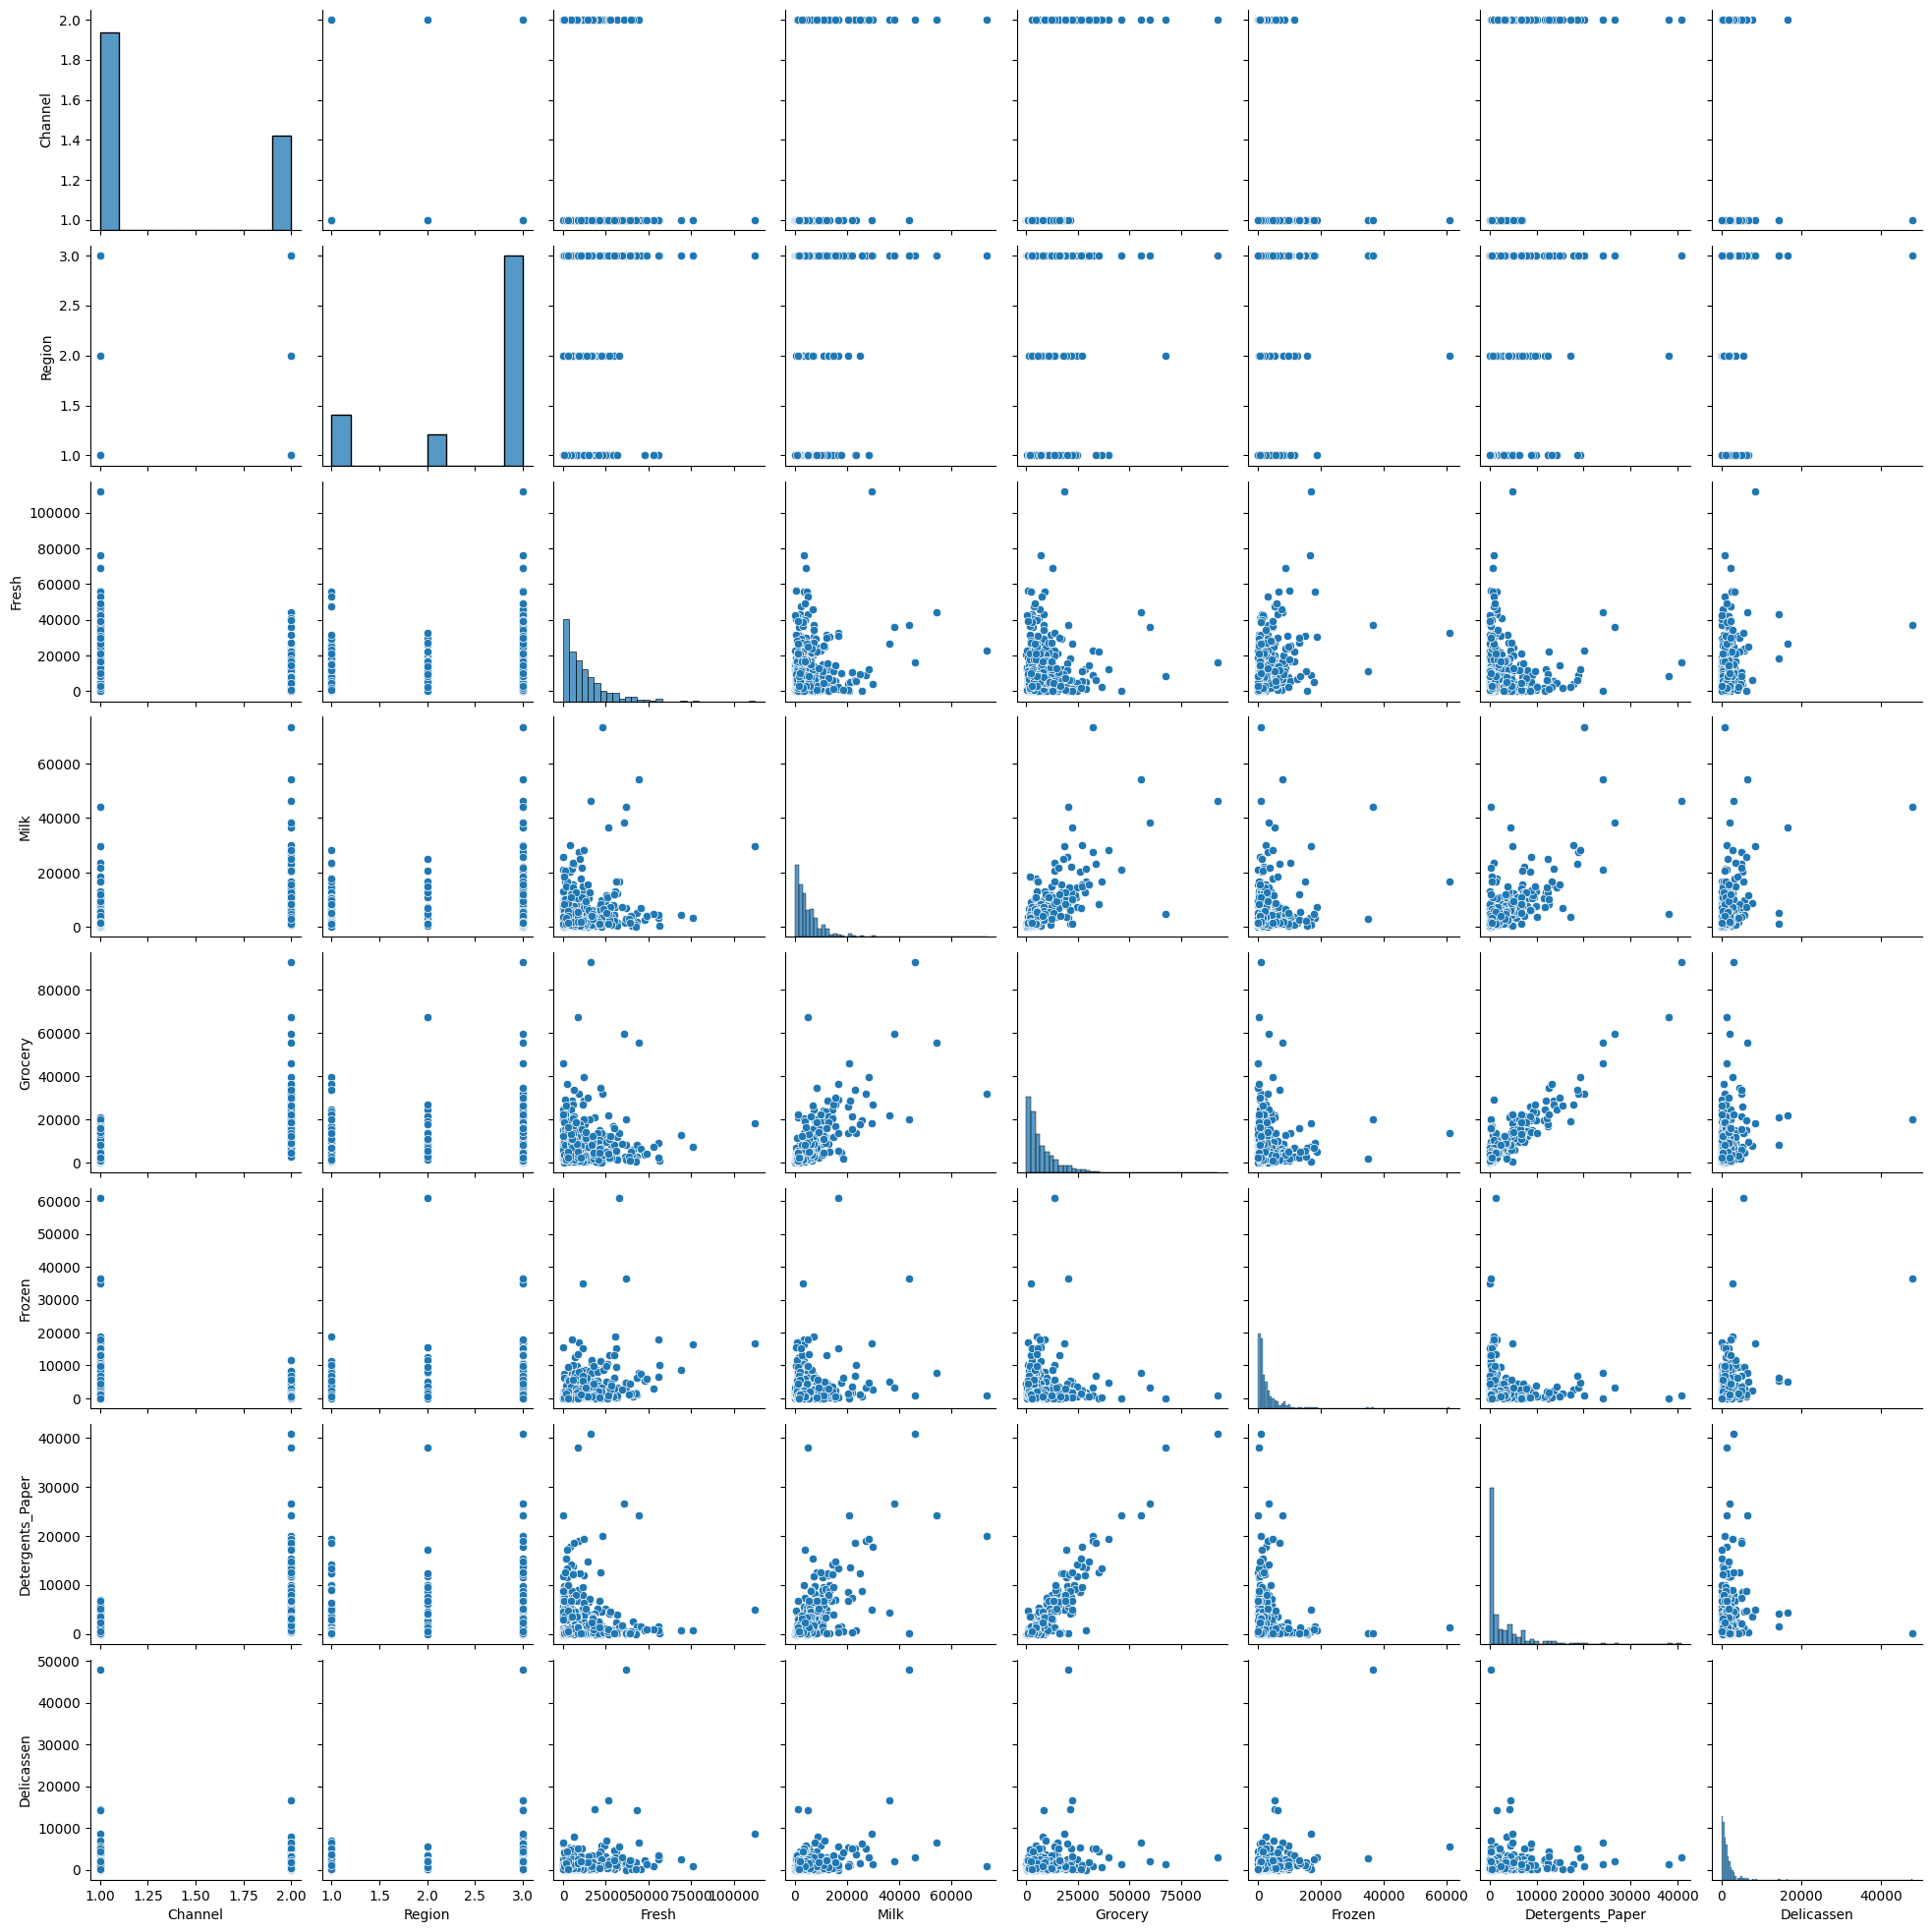

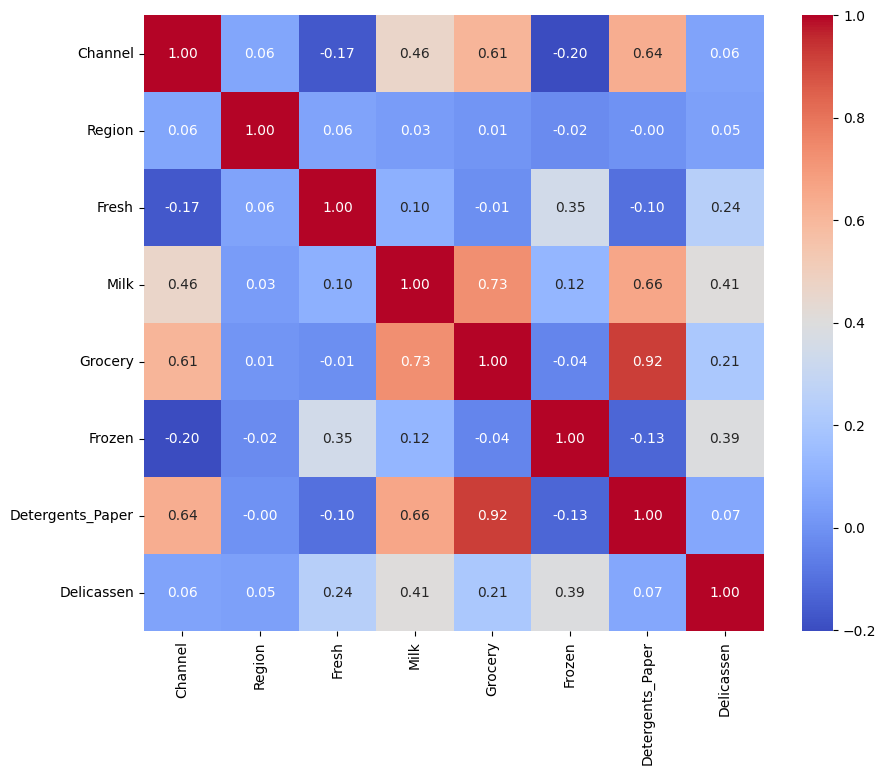

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions of numeric features
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True)
    plt.title('Distribution of ' + column)
    plt.show()

# Pairplot to visualize potential relationships and clusters
sns.pairplot(data.select_dtypes(include=['float64', 'int64']))
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


In [5]:
from sklearn.preprocessing import StandardScaler

data.fillna(data.mean(), inplace=True)

data = pd.get_dummies(data, drop_first=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)


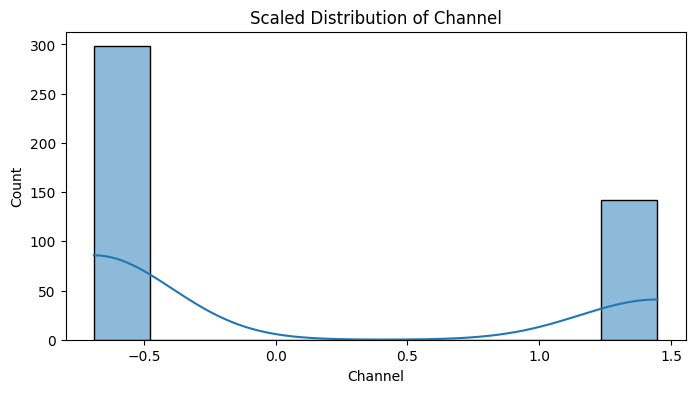

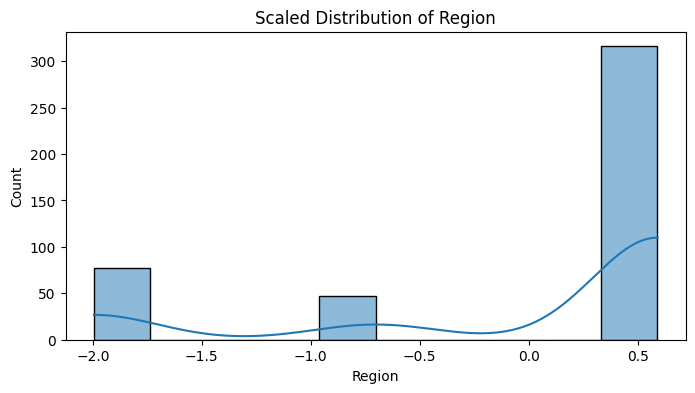

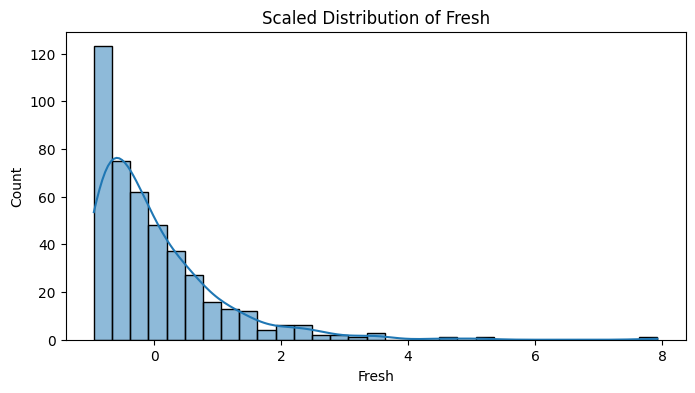

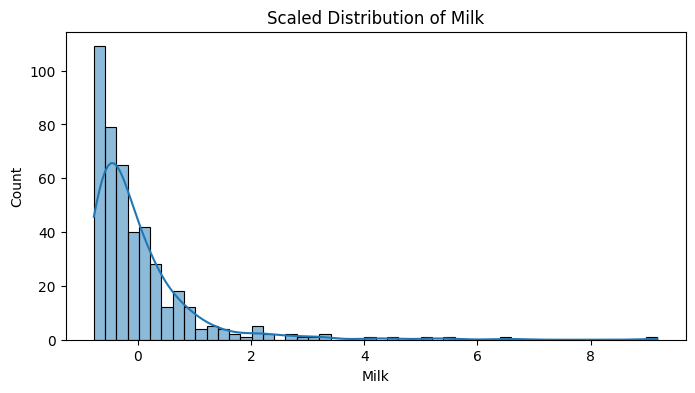

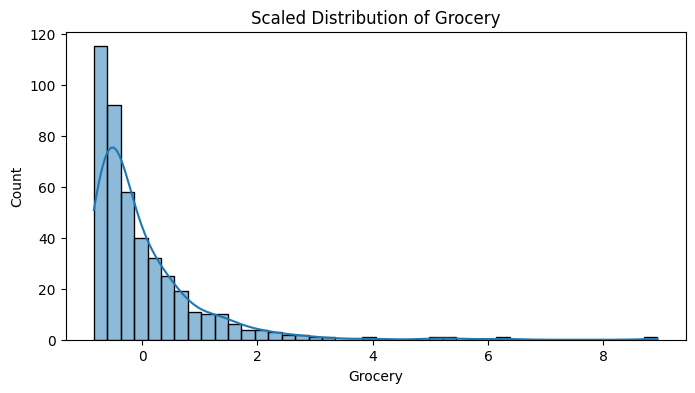

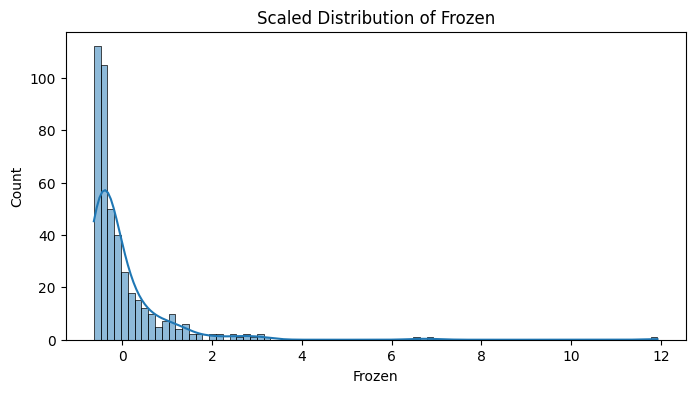

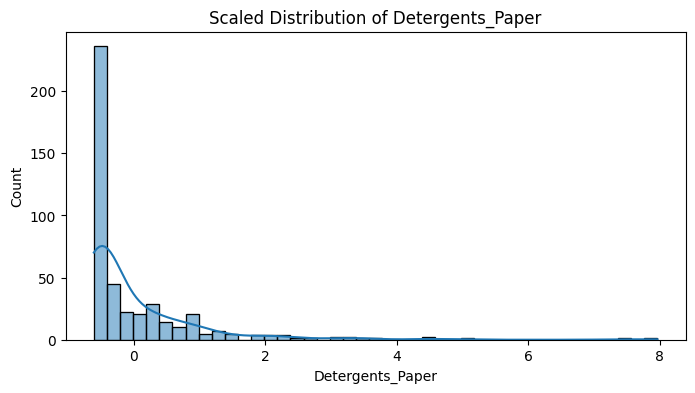

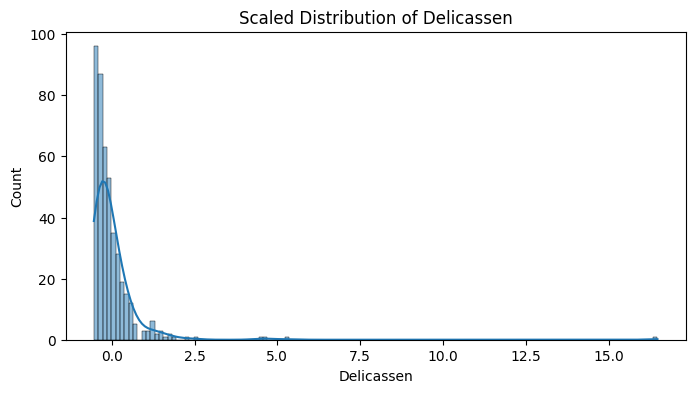

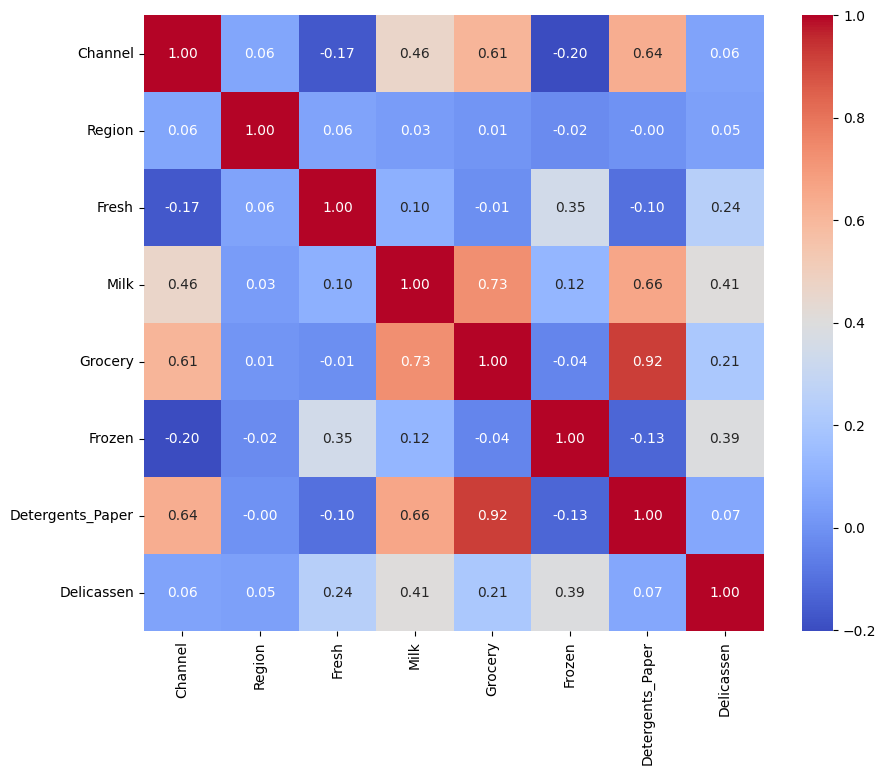

In [6]:

for column in scaled_data.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(scaled_data[column], kde=True)
    plt.title('Scaled Distribution of ' + column)
    plt.show()


plt.figure(figsize=(10, 8))
sns.heatmap(scaled_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


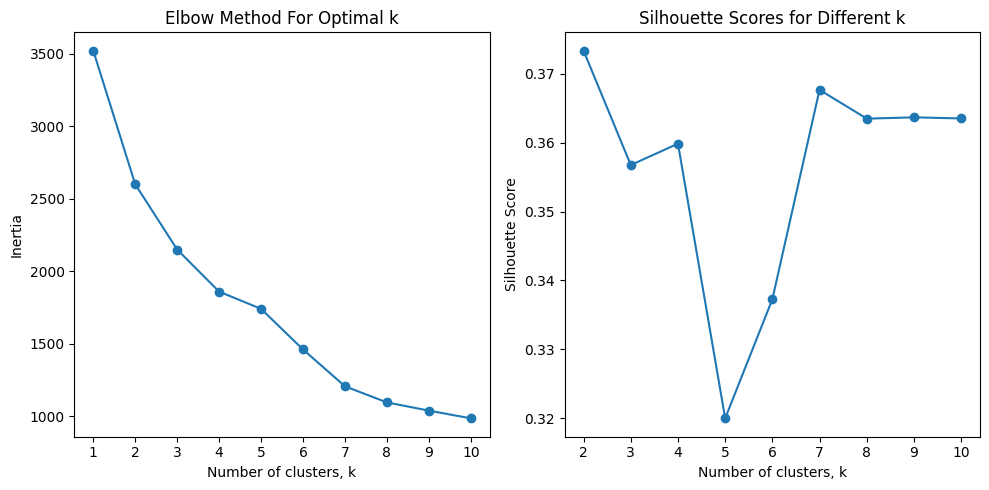

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


ks = range(1, 11)
inertias = []
silhouette_scores = []

for k in ks:
    model = KMeans(n_clusters=k, random_state=42,n_init='auto')
    model.fit(scaled_data)
    inertias.append(model.inertia_)

    if k > 1:
        score = silhouette_score(scaled_data, model.labels_)
        silhouette_scores.append(score)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(ks)


plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.xticks(range(2, 11))
plt.tight_layout()
plt.show()


In [8]:
from sklearn.cluster import AgglomerativeClustering

kmeans = KMeans(n_clusters=3, random_state=42,n_init='auto')
kmeans_labels = kmeans.fit_predict(scaled_data)


agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(scaled_data)


data_with_clusters = pd.DataFrame(data)
data_with_clusters['KMeans_Clusters'] = kmeans_labels
data_with_clusters['Agglo_Clusters'] = agglo_labels

# Create a crosstab to see the relationship between the two cluster labels
crosstab = pd.crosstab(data_with_clusters['KMeans_Clusters'], data_with_clusters['Agglo_Clusters'])

from sklearn.decomposition import PCA


pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['KMeans_Clusters'] = kmeans_labels
pca_df['Agglo_Clusters'] = agglo_labels

crosstab, pca_df.head()


(Agglo_Clusters   0    1    2
 KMeans_Clusters             
 0                0    0  130
 1                0  296    1
 2                6    2    5,
         PC1       PC2  KMeans_Clusters  Agglo_Clusters
 0  0.843939 -0.515351                0               2
 1  1.062676 -0.484601                0               2
 2  1.269141  0.682055                0               2
 3 -1.056782  0.610821                1               1
 4  0.634030  0.974199                0               2)

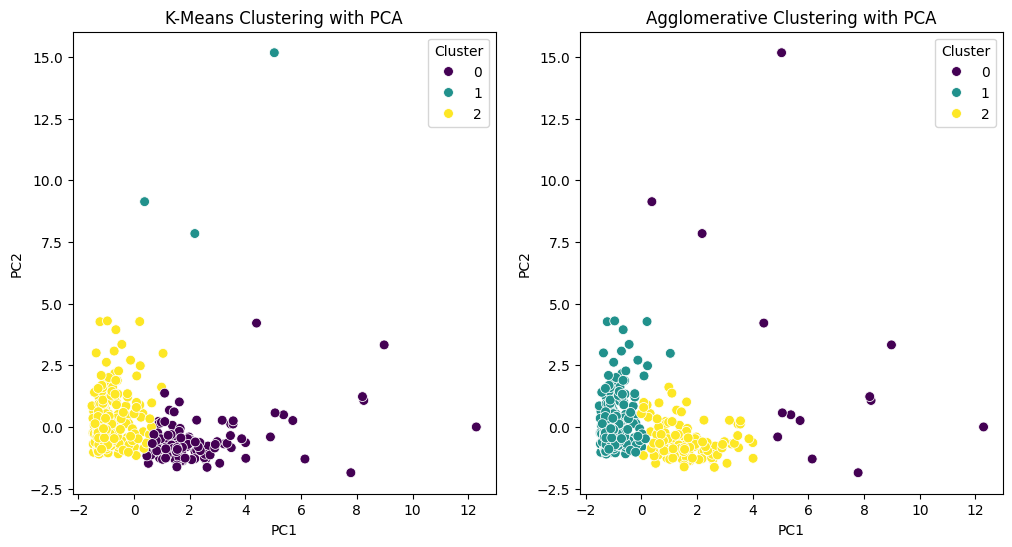

In [9]:
# K-means and Agglomerative clustering on PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42,n_init='auto')
pca_df['KMeans_PCA_Clusters'] = kmeans_pca.fit_predict(pca_df[['PC1', 'PC2']])

agglo_pca = AgglomerativeClustering(n_clusters=3)
pca_df['Agglo_PCA_Clusters'] = agglo_pca.fit_predict(pca_df[['PC1', 'PC2']])


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_PCA_Clusters', data=pca_df, palette='viridis', s=50)
plt.title('K-Means Clustering with PCA')
plt.legend(title='Cluster')

plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='Agglo_PCA_Clusters', data=pca_df, palette='viridis', s=50)
plt.title('Agglomerative Clustering with PCA')
plt.legend(title='Cluster')

plt.show()


In [10]:
from google.colab import auth
auth.authenticate_user()
import requests
gcloud_token = !gcloud auth print-access-token
gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
user = gcloud_tokeninfo['email']
import datetime
dt = datetime.datetime.now()
x = str(dt).split('.')[0]
print(f"This Script is executed by: ",user, "at", x)

This Script is executed by:  saravanakumar.t2023@vitstudent.ac.in at 2024-04-16 18:33:12
